<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/GARCH_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates a simple GARCH model on a synthetic time series data set<br>

<br><br>
---

Written by: Arjang Fahim
Date: 10/12/2020
Last update: 5/8/2022

In [2]:
! pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 902 kB 26.9 MB/s 
     |████████████████████████████████| 9.8 MB 55.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [23]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

GARCH(2,2) Model, we model based on two previous lags

$a_t$ = $𝜺_{t}$ $\sqrt{ω+\alpha_1\alpha_{t-1}^2 + \alpha_2\alpha_{t-2}^2+\beta_1\sigma_{t-1}^2+\beta_2\sigma_{t-2}^2}$

$\alpha_0$,$\alpha_1$ ~ 𝒩(0,1) <br>
$\sigma_0$ = 1, $\sigma_1$ = 1 <br>
$\epsilon_t$ ~ 𝒩(0,1)

In [33]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

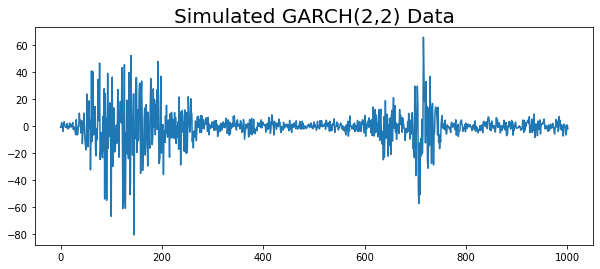

In [36]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

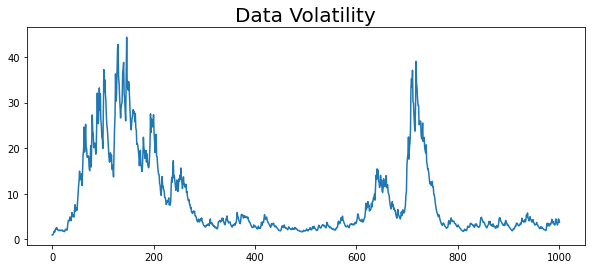

In [37]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

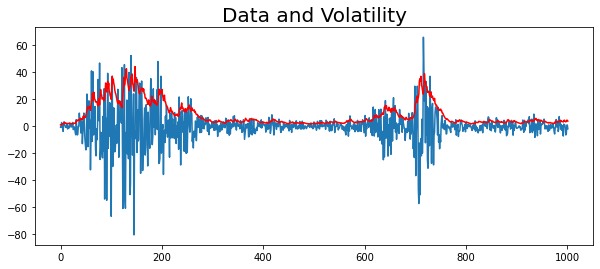

In [38]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

PACF plot maybe help us to find if GARCH model is suitable for this data. After 2 the spike goes doen (graph below) so it seems 2 will be a good number to start with for the GARCH

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


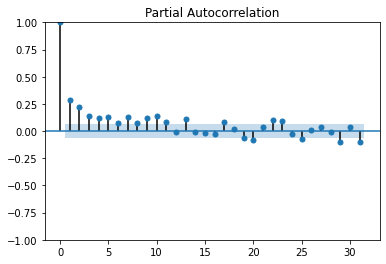

In [39]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [40]:
train, test = series[:-test_size], series[-test_size:]

In [41]:
model = arch_model(train, p=2, q=2)

In [42]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 3005.6087106697823
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2983.5714655445217
Iteration:      3,   Func. Count:     27,   Neg. LLF: 2953.359332262574
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2939.5029366585345
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2934.5119066726484
Iteration:      6,   Func. Count:     54,   Neg. LLF: 2929.8666885561342
Iteration:      7,   Func. Count:     63,   Neg. LLF: 2920.3776335036055
Iteration:      8,   Func. Count:     72,   Neg. LLF: 2918.709717459521
Iteration:      9,   Func. Count:     81,   Neg. LLF: 2918.263436008414
Iteration:     10,   Func. Count:     89,   Neg. LLF: 2917.6416687195488
Iteration:     11,   Func. Count:     97,   Neg. LLF: 2916.345478055841
Iteration:     12,   Func. Count:    105,   Neg. LLF: 2916.2242598085495
Iteration:     13,   Func. Count:    113,   Neg. LLF: 2916.1970820727875
Iteration:     14,   Func. Count:    121,   Neg. LLF: 2

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2916.17
Distribution:                  Normal   AIC:                           5844.34
Method:            Maximum Likelihood   BIC:                           5873.17
                                        No. Observations:                  902
Date:                Tue, Jun 07 2022   Df Residuals:                      901
Time:                        06:26:12   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0129      0.114     -0.113      0.910 [ -0.237,  0.211]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4815      0.219      2.200  2.784e-02  [5.245e-02,  0.911]
alpha[1]       0.1006  3.410e-02      2.951  3.165e-03  [3.380e-02,  0.167]
alpha[2]       0.1722  6.257e-02      2.752  5.920e-03  [4.957e-02,  0.295]
beta[1]        0.5287      0.273      1.938  5.265e-02 [-6.053e-03,  1.063]
beta[2]        0.1985      0.217      0.915      0.360    [ -0.227,  0.623]
===========================================================================

Covariance estimator: robust
"""

In the buttom of the model summary, there are estimation of the parameters.
omega for example is estimated 0.53 the given value was 0.4 and corresponding p 
vals are small enough so we can keep them. (Note since data are generated randmly you will get different result)

# Predict

In [44]:
predictions = model_fit.forecast(horizon=test_size)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


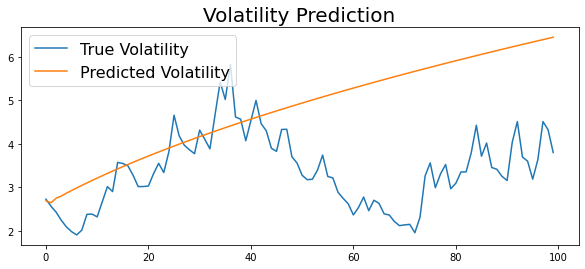

In [45]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


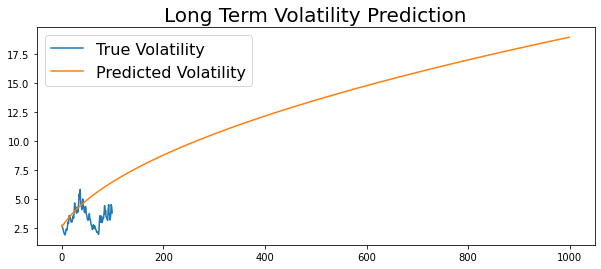

In [46]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [47]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

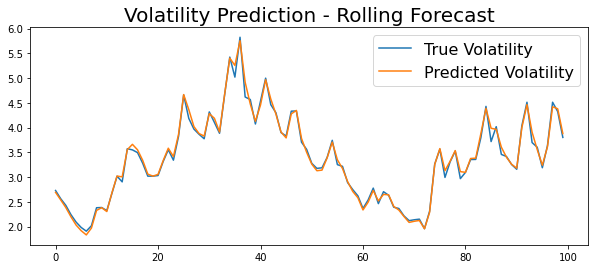

In [48]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)